<a href="https://colab.research.google.com/github/jmcava/jmcava/blob/main/Zona_284_votos_Dep_Estadual_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

# Caminho do arquivo CSV
file_path = '/content/votacao_candidato_284.csv'

# Carregar o arquivo com a codificação adequada e o separador correto
try:
    df = pd.read_csv(file_path, encoding='utf-8', sep=';')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1', sep=';')

# Exibir as colunas para confirmação
print("Colunas disponíveis no arquivo:")
print(df.columns)

# Filtrar apenas os candidatos eleitos e reeleitos com base na situação de totalização
# Certifique-se de ajustar os valores de acordo com a nomenclatura do seu arquivo
df_eleitos = df[df['Situação totalização'].str.contains('Eleito', case=False, na=False)]

# Selecionar colunas relevantes
df_eleitos = df_eleitos[['Nome candidato', 'Partido','Votos nominais']]

# Ordenar por votos nominais de forma decrescente
df_eleitos_sorted = df_eleitos.sort_values(by='Votos nominais', ascending=False)

# Mostrar os primeiros registros para validação
print(df_eleitos_sorted.head())

# Salvar o resultado em um novo arquivo CSV
df_eleitos_sorted.to_csv('/content/candidatos_eleitos_284.csv', index=False, encoding='utf-8')


Colunas disponíveis no arquivo:
Index(['Ano de eleição', 'Nome candidato', 'Partido', 'Situação totalização',
       'Votos nominais', 'Data de carga'],
      dtype='object')
                        Nome candidato    Partido  Votos nominais
753              CARLA SARDANO MORANDO       PSDB           12759
1055         EDUARDO MATARAZZO SUPLICY         PT            2928
1096             THIAGO REIS AURICCHIO         PL            1845
1877  ANA CAROLINA ROSSI BARRETO SERRA  CIDADANIA            1537
1433        TEONÍLIO MONTEIRO DA COSTA         PT            1394


In [12]:
print(df_eleitos)

                   Nome candidato Partido  Votos nominais
15    DANILO MASCARENHAS DE BALAS      PL             120
16     JOSE ANTONIO BARROS MUNHOZ    PSDB              15
23        THAINARA KAROLINE FARIA      PT              28
27       ADRIANO DE BARROS CARUSO     PTB               0
28          JOSE MARCIO DE CAMPOS     PTB               0
...                           ...     ...             ...
1919                 ALDO ALMEIDA    AGIR               0
1920   PAULO KAZUO DE SOUZA IFUKU    AGIR               3
1921         WAGNER ALVES DE LIMA    AGIR               1
1922             REINALDO MARTINS    AGIR               0
1923           EDVAN LIMA BARBOSA     PMB               0

[784 rows x 3 columns]


In [13]:
# Verifique os valores únicos na coluna de Situação totalização para identificar o termo correto
print(df['Situação totalização'].unique())

# Ajustar o filtro para incluir apenas candidatos eleitos
df_eleitos_corrigido = df[df['Situação totalização'].isin(['Eleito', 'Eleito por Média', 'Eleito por QP'])]

# Recontar o total de candidatos eleitos
total_eleitos_corrigido = len(df_eleitos_corrigido)
print(f"Total de candidatos eleitos: {total_eleitos_corrigido}")


['Suplente' 'Eleito' 'Não Eleito']
Total de candidatos eleitos: 94


In [15]:
# Filtrar apenas os candidatos eleitos
df_eleitos = df[df['Situação totalização'] == 'Eleito']

# Selecionar as colunas necessárias e ordená-las
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Exibir as primeiras linhas do resultado
print(df_final.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final.to_csv('/content/candidatos_eleitos_filtrados.csv', index=False, encoding='utf-8')


                 Nome candidato Partido  Votos nominais
15  DANILO MASCARENHAS DE BALAS      PL             120
16   JOSE ANTONIO BARROS MUNHOZ    PSDB              15
23      THAINARA KAROLINE FARIA      PT              28
71            ANALICE FERNANDES    PSDB              20
72   VINICIUS ALMEIDA CAMARINHA    PSDB               6


In [16]:
# Filtrar apenas os candidatos eleitos
df_eleitos = df[df['Situação totalização'] == 'Eleito']

# Selecionar as colunas necessárias
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Exibir as primeiras linhas do resultado ordenado
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados.csv', index=False, encoding='utf-8')


                        Nome candidato    Partido  Votos nominais
753              CARLA SARDANO MORANDO       PSDB           12759
1055         EDUARDO MATARAZZO SUPLICY         PT            2928
1096             THIAGO REIS AURICCHIO         PL            1845
1877  ANA CAROLINA ROSSI BARRETO SERRA  CIDADANIA            1537
1433        TEONÍLIO MONTEIRO DA COSTA         PT            1394


In [17]:
# Filtrar os candidatos eleitos e selecionar as colunas necessárias
df_eleitos = df[df['Situação totalização'] == 'Eleito']
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Enumerar os candidatos na ordem, começando pelo número 1
df_final_sorted['Posição'] = range(1, len(df_final_sorted) + 1)

# Exibir as primeiras linhas do resultado com a numeração
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados_com_numeracao.csv', index=False, encoding='utf-8')


                        Nome candidato    Partido  Votos nominais  Posição
753              CARLA SARDANO MORANDO       PSDB           12759        1
1055         EDUARDO MATARAZZO SUPLICY         PT            2928        2
1096             THIAGO REIS AURICCHIO         PL            1845        3
1877  ANA CAROLINA ROSSI BARRETO SERRA  CIDADANIA            1537        4
1433        TEONÍLIO MONTEIRO DA COSTA         PT            1394        5


In [18]:
# Filtrar os candidatos eleitos e selecionar as colunas necessárias
df_eleitos = df[df['Situação totalização'] == 'Eleito']
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Enumerar os candidatos na ordem, começando pelo número 1
df_final_sorted['Posição'] = range(1, len(df_final_sorted) + 1)

# Reorganizar as colunas para garantir que 'Posição' seja a primeira
df_final_sorted = df_final_sorted[['Posição', 'Nome candidato', 'Partido', 'Votos nominais']]

# Exibir as primeiras linhas do resultado com a numeração
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados_com_numeracao.csv', index=False, encoding='utf-8')


      Posição                    Nome candidato    Partido  Votos nominais
753         1             CARLA SARDANO MORANDO       PSDB           12759
1055        2         EDUARDO MATARAZZO SUPLICY         PT            2928
1096        3             THIAGO REIS AURICCHIO         PL            1845
1877        4  ANA CAROLINA ROSSI BARRETO SERRA  CIDADANIA            1537
1433        5        TEONÍLIO MONTEIRO DA COSTA         PT            1394


In [19]:
# Exibir o índice das linhas do DataFrame final para ver de onde elas vêm
print(df_final_sorted.index)


Index([ 753, 1055, 1096, 1877, 1433, 1184, 1463, 1878, 1171,  275,  442, 1097,
       1238, 1167, 1809, 1379,  196,  712, 1516, 1255,  564, 1383, 1703,  313,
        810,  204, 1042,  330,  123,  817, 1476, 1880,  312,  583, 1165, 1328,
       1568, 1128,  132,   15,  256,  154,  396,  945, 1303,  932,  184,  344,
        133, 1310, 1431,  319,  327, 1008, 1461, 1156, 1247,  752,  630, 1574,
        935,   23,  758,  988,  494,  326, 1812,   71,  819,  960,  826,   16,
        511,  398,  930, 1782, 1612, 1434, 1243,  513,  696, 1701,  627,  779,
       1873, 1791,  780,  570,   72, 1627,  697, 1629, 1053, 1771],
      dtype='int64')


In [20]:
# Exibir o índice das linhas do DataFrame final para ver de onde elas vêm
print(df_final_sorted.index)


Index([ 753, 1055, 1096, 1877, 1433, 1184, 1463, 1878, 1171,  275,  442, 1097,
       1238, 1167, 1809, 1379,  196,  712, 1516, 1255,  564, 1383, 1703,  313,
        810,  204, 1042,  330,  123,  817, 1476, 1880,  312,  583, 1165, 1328,
       1568, 1128,  132,   15,  256,  154,  396,  945, 1303,  932,  184,  344,
        133, 1310, 1431,  319,  327, 1008, 1461, 1156, 1247,  752,  630, 1574,
        935,   23,  758,  988,  494,  326, 1812,   71,  819,  960,  826,   16,
        511,  398,  930, 1782, 1612, 1434, 1243,  513,  696, 1701,  627,  779,
       1873, 1791,  780,  570,   72, 1627,  697, 1629, 1053, 1771],
      dtype='int64')


In [21]:
# Exibir o DataFrame sem o índice
print(df_final_sorted.to_string(index=False))


 Posição                         Nome candidato       Partido  Votos nominais
       1                  CARLA SARDANO MORANDO          PSDB           12759
       2              EDUARDO MATARAZZO SUPLICY            PT            2928
       3                  THIAGO REIS AURICCHIO            PL            1845
       4       ANA CAROLINA ROSSI BARRETO SERRA     CIDADANIA            1537
       5             TEONÍLIO MONTEIRO DA COSTA            PT            1394
       6                            TOME ABDUCH  REPUBLICANOS            1044
       7                 BRUNO ZAMBELLI SALGADO            PL            1038
       8        LUIZ FERNANDO TEIXEIRA FERREIRA            PT            1032
       9                 PAULA NUNES DOS SANTOS          PSOL            1004
      10                CARLOS ALBERTO GIANNASI          PSOL             875
      11              ROBERVAL CONTE LOPES LIMA            PL             637
      12                    DIMAS MECCA SAMPAIO            PL   

In [22]:
# Exibir o DataFrame sem o índice
print(df_final_sorted.to_string(index=False))


 Posição                         Nome candidato       Partido  Votos nominais
       1                  CARLA SARDANO MORANDO          PSDB           12759
       2              EDUARDO MATARAZZO SUPLICY            PT            2928
       3                  THIAGO REIS AURICCHIO            PL            1845
       4       ANA CAROLINA ROSSI BARRETO SERRA     CIDADANIA            1537
       5             TEONÍLIO MONTEIRO DA COSTA            PT            1394
       6                            TOME ABDUCH  REPUBLICANOS            1044
       7                 BRUNO ZAMBELLI SALGADO            PL            1038
       8        LUIZ FERNANDO TEIXEIRA FERREIRA            PT            1032
       9                 PAULA NUNES DOS SANTOS          PSOL            1004
      10                CARLOS ALBERTO GIANNASI          PSOL             875
      11              ROBERVAL CONTE LOPES LIMA            PL             637
      12                    DIMAS MECCA SAMPAIO            PL   

In [24]:
!pip install matplotlib

Codificação detectada: ISO-8859-1


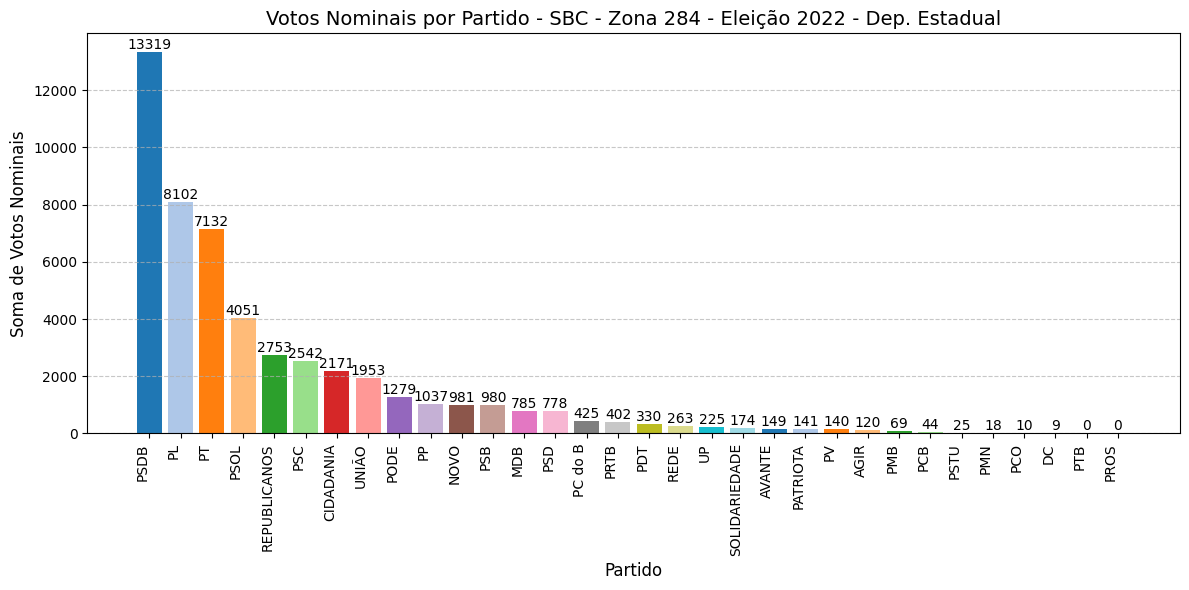

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

# Detecta a codificação
with open("/content/votacao_candidato_284.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

print(f"Codificação detectada: {result['encoding']}")

# Carrega o CSV com a codificação e o separador corretos
df_284 = pd.read_csv("/content/votacao_candidato_284.csv", encoding=result['encoding'], sep=";")

# Agrupa por partido e soma os votos nominais
df_agregado_284 = df_284.groupby('Partido')['Votos nominais'].sum().reset_index()

# Ordena os dados para o gráfico (opcional, mas recomendado)
df_agregado_284 = df_agregado_284.sort_values('Votos nominais', ascending=False)



# Cria o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(df_agregado_284['Partido'], df_agregado_284['Votos nominais'], color=plt.colormaps['tab20'].colors)

plt.xlabel('Partido', fontsize=12)
plt.ylabel('Soma de Votos Nominais', fontsize=12)
plt.title('Votos Nominais por Partido - SBC - Zona 284 - Eleição 2022 - Dep. Estadual', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}', ha='center', va='bottom')


plt.show()